<a href="https://colab.research.google.com/github/qkb2/AiSD2022/blob/main/Sprawozdanie_sort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sprawozdanie

Niniejsze sprawozdanie ma na celu przetestowanie wydajności popularnych algorytmów sortowania. Porównane zostaną złożoności obliczeniowe oraz ilość zamian i porównań w zależności od typów ciągów podanych na wejściu każdego algorytmu. Rezultaty zostaną przedstawione na wykresach utworzonych z pomocą biblioteki matplotlib.

### Kod przygotowawczy

Testy będą przeprowadzane na podstawie ciągów wygenerowanych przez generator. Do utworzenia wykresów posłuży plik csv z czasami i liczbą operacji dla każdego sortowania i każdego rodzaju ciągu, który został wykreowany dzięki modułowi pandas.

In [ ]:
!git clone https://github.com/qkb2/AiSD2022.git

fatal: destination path 'AiSD2022' already exists and is not an empty directory.


In [ ]:
import sys
sys.path.insert(0,'/content/AiSD2022')

In [ ]:
import generator
import sorts_with_counters
import matplotlib.pyplot as plt
import re
import pandas as pd
from os import path

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)

n = 20000
x_val = [k for k in range(0, n, 2000)]
x_val_2 = [k for k in range(0, 5000, 500)]

if not path.exists("AiSD2022/sort_times.csv"):
    sys.setrecursionlimit(10**6)

    tab_random = generator.random_generator(n)
    tab_increase = generator.increasing_generator(n)
    tab_decrease = generator.decreasing_generator(n)
    tab_a = generator.a_shaped_generator(n)
    tab_v = generator.v_shaped_generator(n)

    tabs = [tab_random, tab_increase, tab_decrease, tab_a, tab_v]
    sorts_tab = []

    for name, val in sorts_with_counters.__dict__.items():
        if re.search(".*_sort_wrapper$", name):
            sorts_tab.append(name)

    sorts_data = dict.fromkeys(sorts_tab)
    
    for k in sorts_data.keys():
        sorts_data[k] = []
        for i in range(5):
            sorts_data[k].append({"times": [], "k": []})

    for k in sorts_data.keys():
        for j in range(len(tabs)):
            for i in range(0, 
                           n if k not in ["insertion_sort_wrapper", "shell_sort_wrapper", "quick_sort_wrapper"] else 5000, 
                           2000 if k not in ["insertion_sort_wrapper", "shell_sort_wrapper", "quick_sort_wrapper"] else 500):
                t_mn = []
                for o in range(10):
                    srt_dt = getattr(sorts_with_counters, k)(tabs[j][:i])
                    t_mn.append(srt_dt[3])
                sorts_data[k][j]["times"].append(sum(t_mn)/len(t_mn))
                sorts_data[k][j]["k"].append(srt_dt[1] + srt_dt[2])

    sorts_data["data_types"] = ["random", "increasing", "decreasing", "a shaped", "v shaped"]
    df = pd.DataFrame(sorts_data)
    df.to_csv("AiSD2022/sort_times.csv", index=False)
    

with open("AiSD2022/sort_times.csv") as sort_times:
    df1 = pd.read_csv(sort_times)
    for k in df1.columns[:-1]:
        df1[k] = df1[k].apply(eval)
    display(df1)

,merge_sort_wrapper,heap_sort_wrapper,insertion_sort_wrapper,shell_sort_wrapper,quick_sort_wrapper,data_types
0,"{'times': [1.2671001968556083e-06, 0.018453759...","{'times': [1.6310998944391031e-06, 0.043686446...","{'times': [1.0296001164533664e-06, 0.042561611...","{'times': [6.004999704600777e-07, 0.0346459209...","{'times': [1.3515998944058083e-06, 0.003215272...",random
1,"{'times': [8.722998245502823e-07, 0.0154024766...","{'times': [1.3968000530439894e-06, 0.045982835...","{'times': [6.790998668293468e-07, 0.0002213226...","{'times': [5.462999979499727e-07, 0.0003075950...","{'times': [1.1657999493763783e-06, 0.089475596...",increasing
2,"{'times': [8.434998562734109e-07, 0.0176178909...","{'times': [1.436099955753889e-06, 0.0418970918...","{'times': [5.394000254455022e-07, 0.0869852068...","{'times': [4.351001734903548e-07, 0.0661412240...","{'times': [2.4249999114545063e-06, 0.070643605...",decreasing
3,"{'times': [6.878998647152912e-07, 0.0171445271...","{'times': [1.5426998288603499e-06, 0.047070179...","{'times': [6.65199968352681e-07, 0.00022240700...","{'times': [5.449998752737883e-07, 0.0003142325...","{'times': [1.2602000424521976e-06, 0.089265742...",a shaped
4,"{'times': [7.508001544920262e-07, 0.0164149379...","{'times': [1.9363998944754714e-06, 0.042381396...","{'times': [5.528000656340737e-07, 0.0891232216...","{'times': [4.3910013118875214e-07, 0.063192498...","{'times': [1.1716000699379946e-06, 0.065820783...",v shaped


## Podział ze względu na sortowania

### Merge sort

Merge sort to rekurencyjny algorytm, który do posortowania ciągu wykorzystuje zasadę "dziel i rządź" powszechnie stosowaną w branży IT. Algorytm dzieli ciąg na pół, do momentu aż otrzyma jedno-elementowe ciągi, które później scala w odpowiedniej kolejnośći. Dużą zaletą merge sorta jest fakt, że jego złożoność obliczeniowa jest taka sama w każdym przypadku, i wynosi O(n*log(n)). Widać to również na poniższym wykresie. Algorytm radzi sobie bardzo dobrze, niezależnie od typu danych jaki otrzyma na wejściu. Wciąż jednak można zauważyć drobne różnice, gdyż ciąg losowy generuje nieco gorsze rezultaty niż pozostałe ciągi.

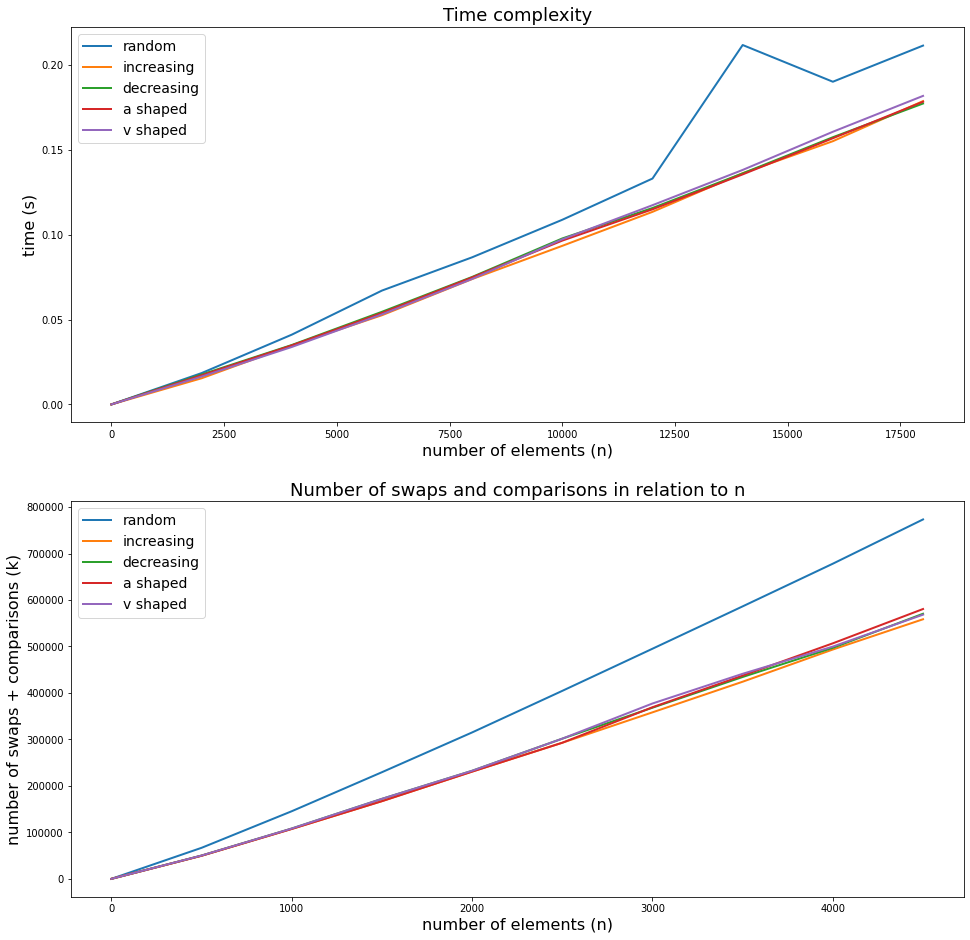

In [ ]:
plt.figure(figsize=(16,16))

plt.subplot(2, 1, 1)
plt.ylabel("time (s)", fontsize=16)
plt.xlabel("number of elements (n)", fontsize=16)
plt.title("Time complexity", fontsize=18)

for i in range(0, len(df1.index.values)):
    plt.plot(x_val, df1.at[i, "merge_sort_wrapper"]["times"], linewidth=2, label=df1.at[i, "data_types"])
    
plt.legend(fontsize=14)

plt.subplot(2, 1, 2)
plt.ylabel("number of swaps + comparisons (k)", fontsize=16)
plt.xlabel("number of elements (n)", fontsize=16)
plt.title("Number of swaps and comparisons in relation to n", fontsize=18)

for i in range(0, len(df1.index.values)):
    plt.plot(x_val_2, df1.at[i, "merge_sort_wrapper"]["k"], linewidth=2, label=df1.at[i, "data_types"])
    
plt.legend(fontsize=14)

### Heap sort

Podobnie jak merge sort, heap sort jest algorytmem rekurencyjnym. Działa on w oparciu o strukturę danych zwaną stertą lub kopcem (heap). Struktura ta jest zbalansowanym drzewem binarnym, które w swoim korzeniu pierwotnym posiada maksymalną wartość ciągu, a każdy potomek jest nie większy od swojego rodzica. Ze wszystkich testowanych tutaj algorytmów heap sort jest najbardziej spójnym algorytmem. Z wykresu można zauważyć, że różnice między typami danych są do pewnego stopnia wręcz niezauważalne.

Jak większość algorytmów rekurencyjnych złożoność obliczeniowa heap sort'a to O(n*log(n)) w najgorszym i średnim przypadku. Natomiast w najlepszym przypadku jego złożoność to O(n), która występuje gdy wszystkie elementy ciągu mają tę samą wartość.

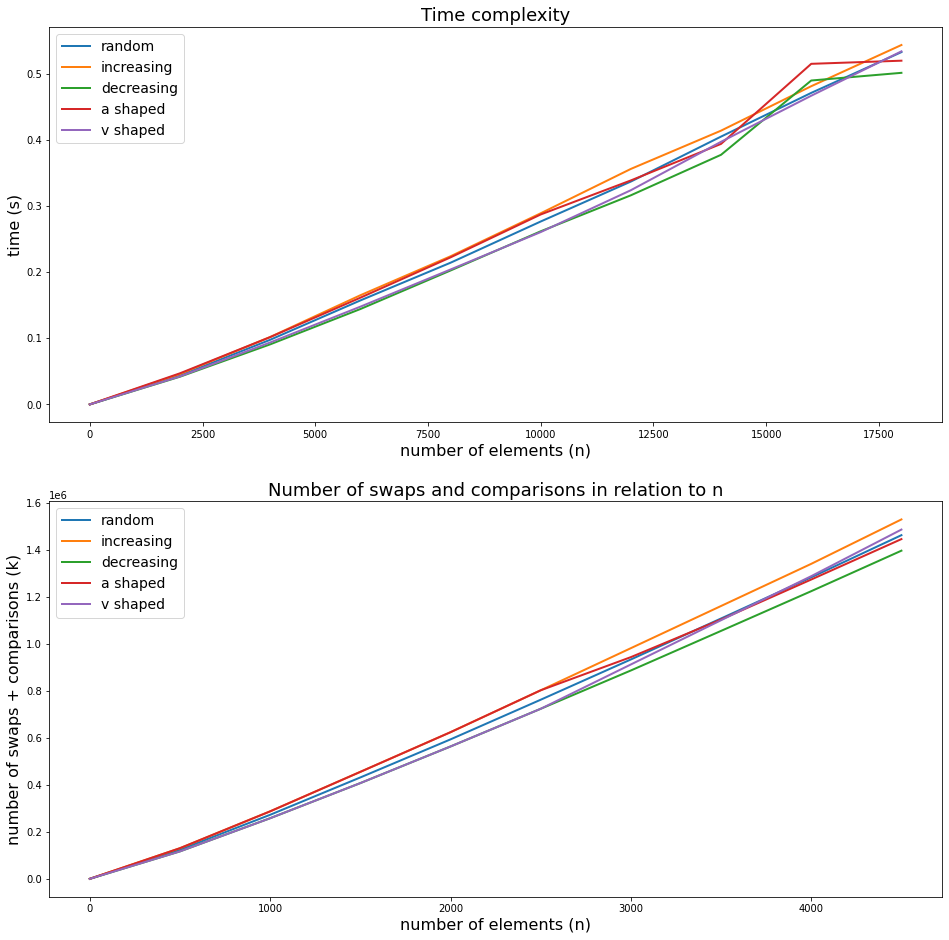

In [ ]:
plt.figure(figsize=(16,16))

plt.subplot(2, 1, 1)
plt.ylabel("time (s)", fontsize=16)
plt.xlabel("number of elements (n)", fontsize=16)
plt.title("Time complexity", fontsize=18)

for i in range(0, len(df1.index.values)):
    plt.plot(x_val, df1.at[i, "heap_sort_wrapper"]["times"], linewidth=2, label=df1.at[i, "data_types"])
    
plt.legend(fontsize=14)

plt.subplot(2, 1, 2)
plt.ylabel("number of swaps + comparisons (k)", fontsize=16)
plt.xlabel("number of elements (n)", fontsize=16)
plt.title("Number of swaps and comparisons in relation to n", fontsize=18)

for i in range(0, len(df1.index.values)):
    plt.plot(x_val_2, df1.at[i, "heap_sort_wrapper"]["k"], linewidth=2, label=df1.at[i, "data_types"])
    
plt.legend(fontsize=14)

### Insertion sort

Insertion sort jest jednym z dwóch algorytmów prymitywnych w naszym zestawieniu. Sortuje ciąg startując na początku listy i z każdą iteracją porównuje następny element z poprzednimi, po czym wstawia go na odpowiednie miejsce. Jego zaletą jest prostota i łatwość implementacji. Natomiast dużą wadą jest oczywiście złożoność obliczneniowa, która w najgorszym i średnim przypadku wynosi O(n^2). W najlepszym przypadku złożoność to O(n), jednak jak widać na wykresie występuje ona tylko w przypadku ciągów rosnącego oraz w kształcie litery A.

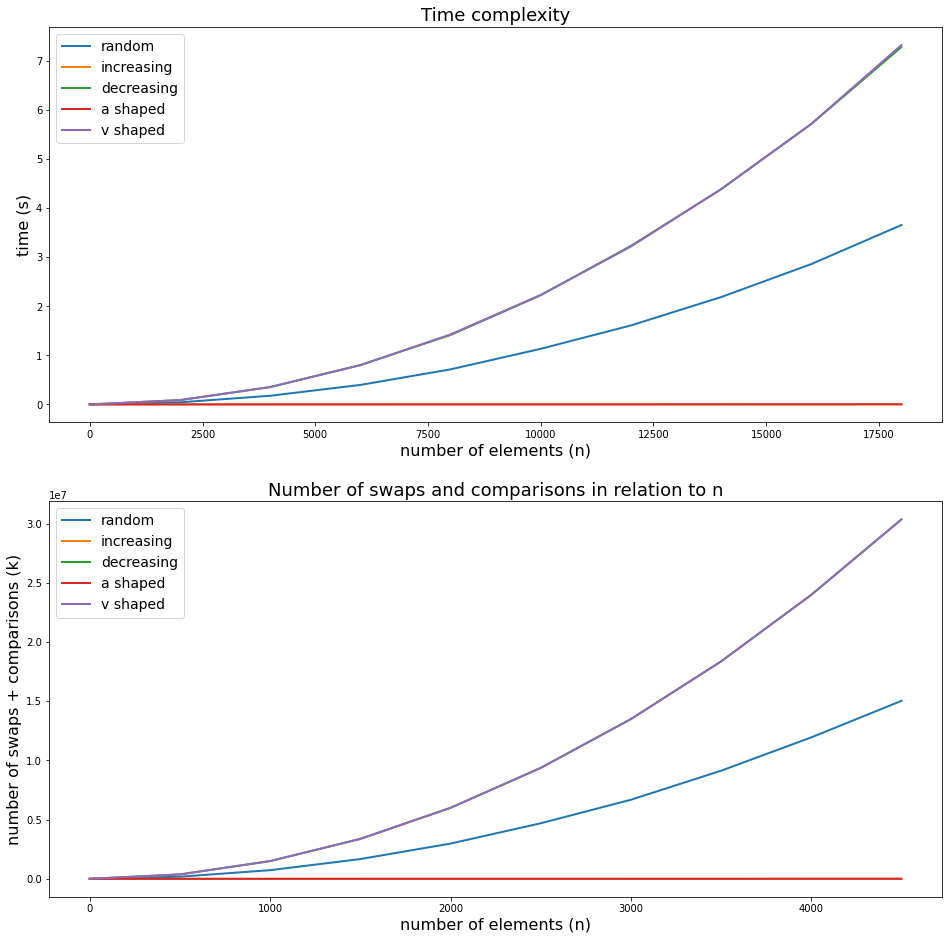

In [ ]:
plt.figure(figsize=(16,16))

plt.subplot(2, 1, 1)
plt.ylabel("time (s)", fontsize=16)
plt.xlabel("number of elements (n)", fontsize=16)
plt.title("Time complexity", fontsize=18)

for i in range(0, len(df1.index.values)):
    plt.plot(x_val, df1.at[i, "insertion_sort_wrapper"]["times"], linewidth=2, label=df1.at[i, "data_types"])
    
plt.legend(fontsize=14)

plt.subplot(2, 1, 2)
plt.ylabel("number of swaps + comparisons (k)", fontsize=16)
plt.xlabel("number of elements (n)", fontsize=16)
plt.title("Number of swaps and comparisons in relation to n", fontsize=18)

for i in range(0, len(df1.index.values)):
    plt.plot(x_val_2, df1.at[i, "insertion_sort_wrapper"]["k"], linewidth=2, label=df1.at[i, "data_types"])
    
plt.legend(fontsize=14)

### Shell sort

Shell sort to drugi z algorytmów prymitywnych w naszym zestawieniu. Można go nazwać nieco usprawnioną wersją insertion sort'a, gdyż zasada jego działania jest bardzo podobna. Różni się jedynie tym, że porównuje ze sobą oraz zamienia wartości, które oddalone są od siebie o pewien przyrost, po czym ten przyrost zmniejsza o połowę (dzielenie całkowite) aż do momentu osiągnięcia wartości 1.

Jak widać po wykresie algorytm ten osiąga nieco lepsze czasy niż insertion sort, lecz jego złożoność obliczeniowa jest właściwie identyczna i wynosi O(n^2) w przypadkach średnim i pesymistycznym oraz O(n) w przypadku optymistycznym. Również jak insertion sort, shell sort radzi sobie najlepiej z ciągami rosnącymi i pseudo-rosnącymi.

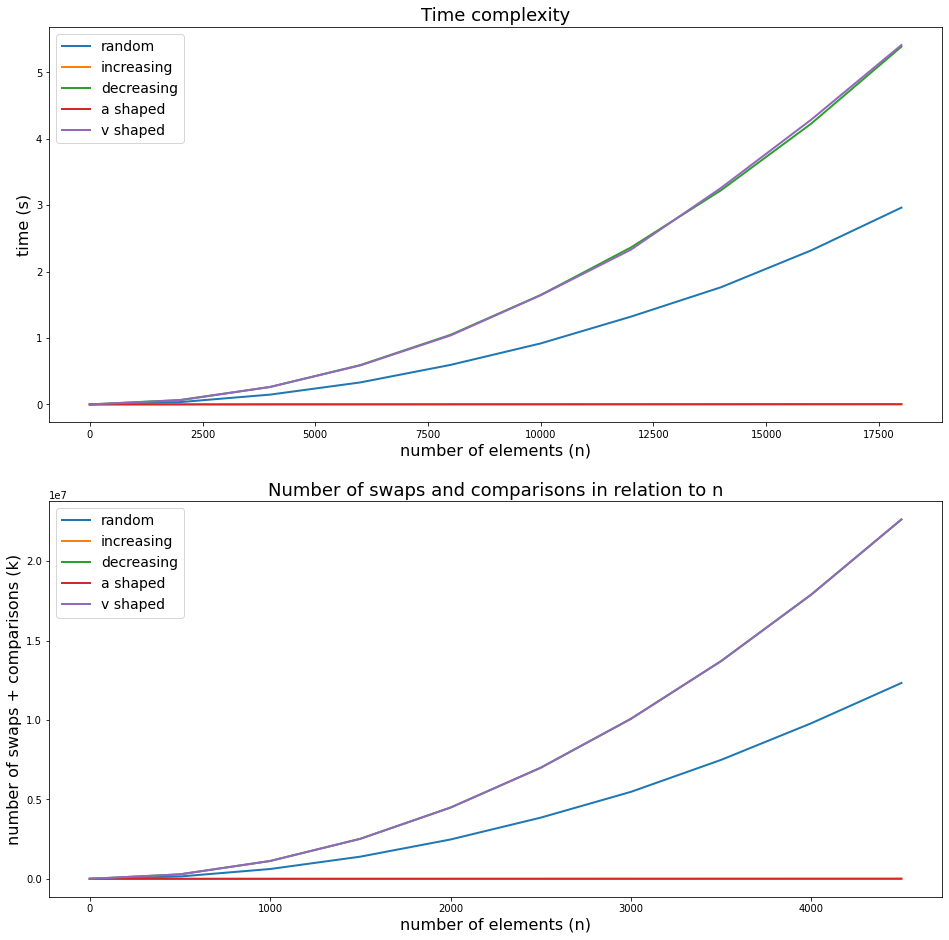

In [ ]:
plt.figure(figsize=(16,16))

plt.subplot(2, 1, 1)
plt.ylabel("time (s)", fontsize=16)
plt.xlabel("number of elements (n)", fontsize=16)
plt.title("Time complexity", fontsize=18)

for i in range(0, len(df1.index.values)):
    plt.plot(x_val, df1.at[i, "shell_sort_wrapper"]["times"], linewidth=2, label=df1.at[i, "data_types"])
    
plt.legend(fontsize=14)

plt.subplot(2, 1, 2)
plt.ylabel("number of swaps + comparisons (k)", fontsize=16)
plt.xlabel("number of elements (n)", fontsize=16)
plt.title("Number of swaps and comparisons in relation to n", fontsize=18)

for i in range(0, len(df1.index.values)):
    plt.plot(x_val_2, df1.at[i, "shell_sort_wrapper"]["k"], linewidth=2, label=df1.at[i, "data_types"])
    
plt.legend(fontsize=14)

### Quick sort

Opis quick sort...

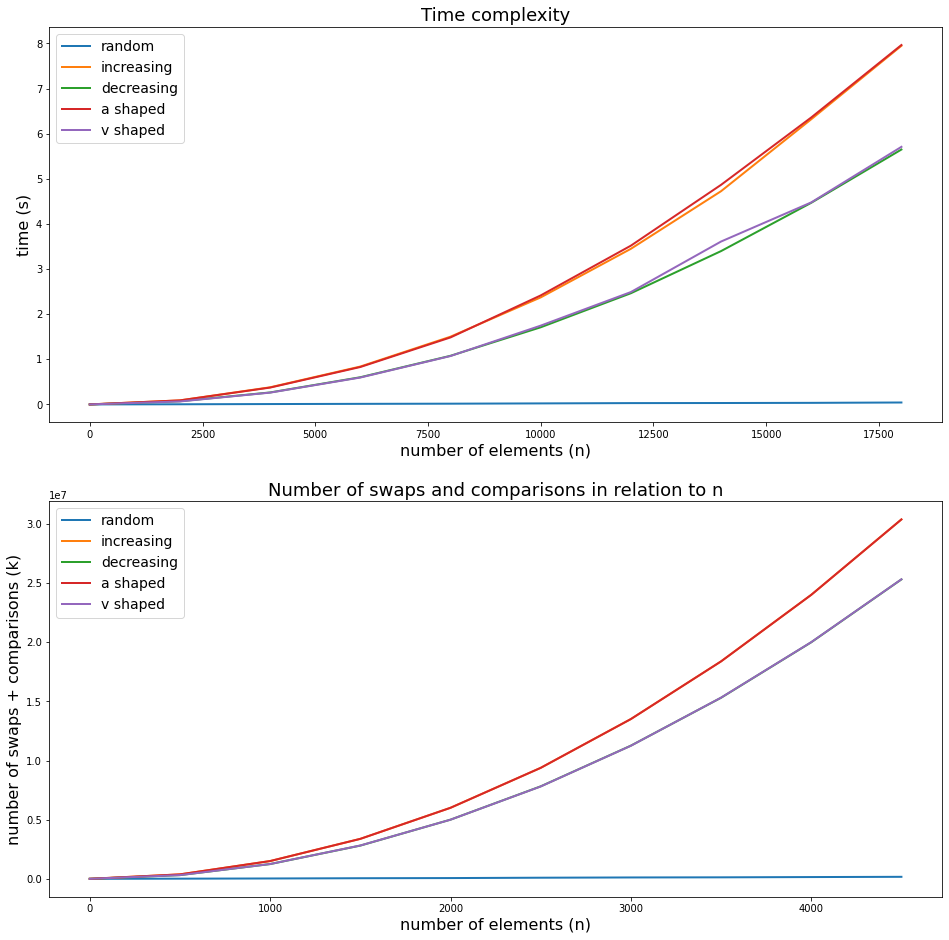

In [ ]:
plt.figure(figsize=(16,16))

plt.subplot(2, 1, 1)
plt.ylabel("time (s)", fontsize=16)
plt.xlabel("number of elements (n)", fontsize=16)
plt.title("Time complexity", fontsize=18)

for i in range(0, len(df1.index.values)):
    plt.plot(x_val, df1.at[i, "quick_sort_wrapper"]["times"], linewidth=2, label=df1.at[i, "data_types"])
    
plt.legend(fontsize=14)

plt.subplot(2, 1, 2)
plt.ylabel("number of swaps + comparisons (k)", fontsize=16)
plt.xlabel("number of elements (n)", fontsize=16)
plt.title("Number of swaps and comparisons in relation to n", fontsize=18)

for i in range(0, len(df1.index.values)):
    plt.plot(x_val_2, df1.at[i, "quick_sort_wrapper"]["k"], linewidth=2, label=df1.at[i, "data_types"])
    
plt.legend(fontsize=14)

## Podział ze względu na typy danych

### Ciąg losowy

...

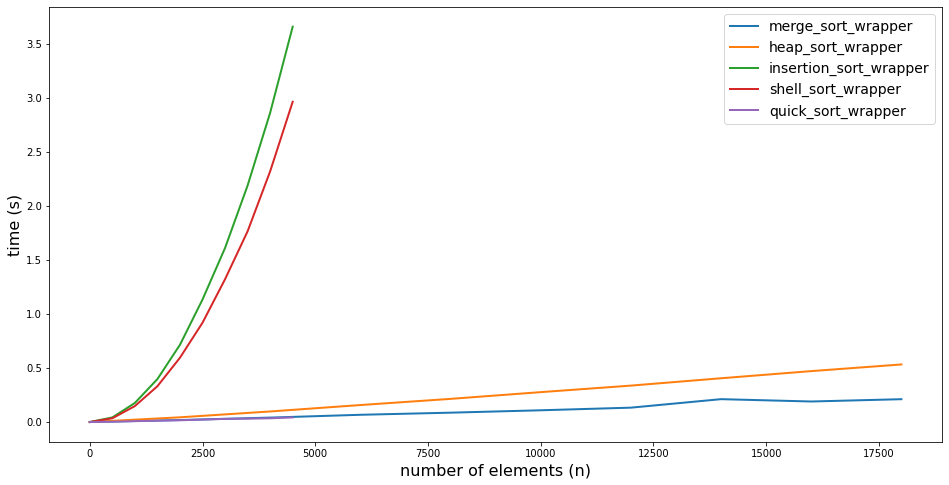

In [ ]:
plt.figure(figsize=(16,8))
plt.ylabel("time (s)", fontsize=16)
plt.xlabel("number of elements (n)", fontsize=16)

for k in df1.columns[:-1]:
    plt.plot(
        x_val if k not in ["insertion_sort_wrapper", "shell_sort_wrapper", "quick_sort_wrapper"] else x_val_2,
        df1.at[0, k]["times"], linewidth=2, label=k)
    
plt.legend(fontsize=14)

### Ciąg rosnący

Z ciągiem rosnącym wszystkie z algorytmów sortowania radzą sobie dobrze z wyjątkiem quick sort'a. Najlepiej wypadają algorytmy prymitywne, jako że nie wykonują w przypadku tego ciągu żadnych operacji zamian.

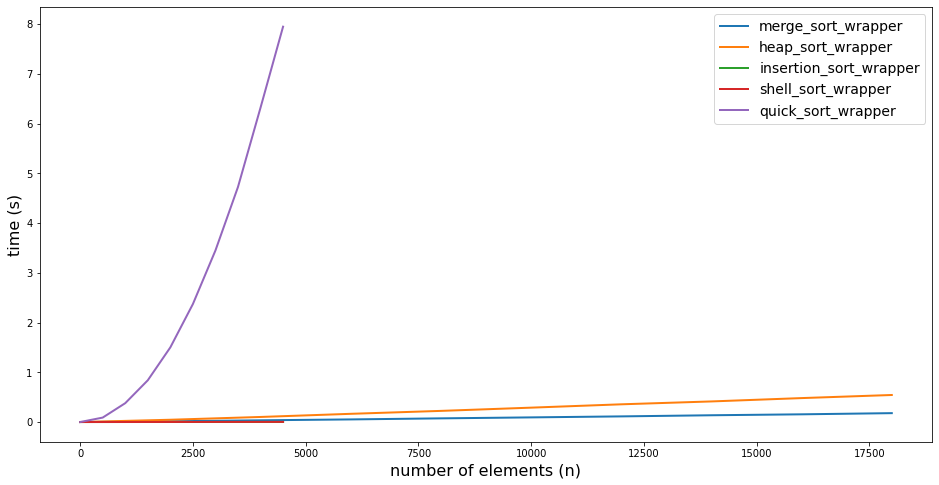

In [ ]:
plt.figure(figsize=(16,8))
plt.ylabel("time (s)", fontsize=16)
plt.xlabel("number of elements (n)", fontsize=16)

for k in df1.columns[:-1]:
    plt.plot(
        x_val if k not in ["insertion_sort_wrapper", "shell_sort_wrapper", "quick_sort_wrapper"] else x_val_2,
        df1.at[1, k]["times"], linewidth=2, label=k)
    
plt.legend(fontsize=14)

### Ciąg malejący

W przypadku ciągu malejącego najgożej radzą sobie algorytmy prymitywne ze względu na naturę ich implemencacji, oraz quick sort. Jeżeli chodzi natomiast o algorytmy szybkie, czyli merge sort i heap sort to możemy zauważyć, że merge sort otrzymuje minimalnie lepszy czas niż heap sort.

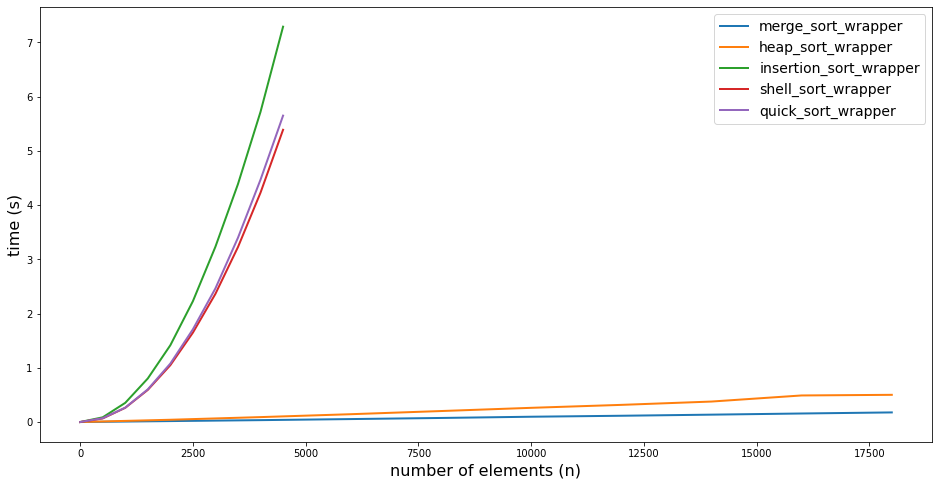

In [ ]:
plt.figure(figsize=(16,8))
plt.ylabel("time (s)", fontsize=16)
plt.xlabel("number of elements (n)", fontsize=16)

for k in df1.columns[:-1]:
    plt.plot(
        x_val if k not in ["insertion_sort_wrapper", "shell_sort_wrapper", "quick_sort_wrapper"] else x_val_2,
        df1.at[2, k]["times"], linewidth=2, label=k)
    
plt.legend(fontsize=14)

### Ciąg w kształcie A

...

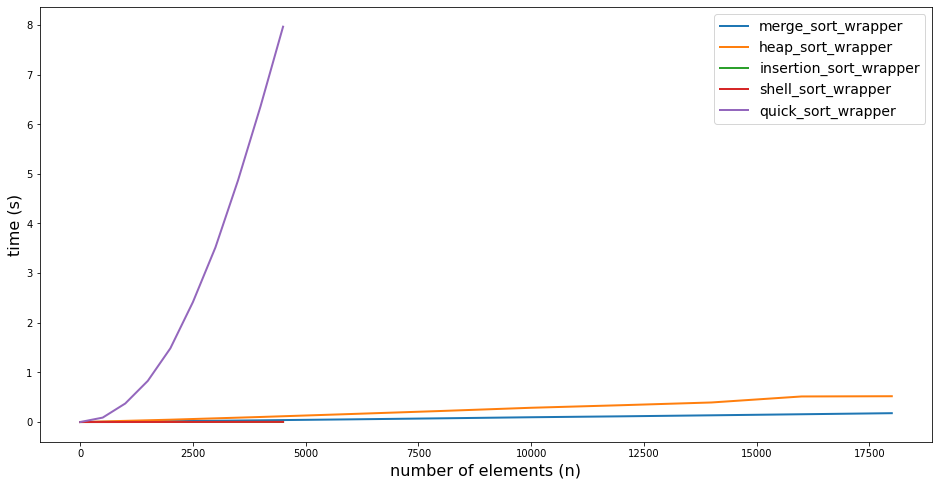

In [ ]:
plt.figure(figsize=(16,8))
plt.ylabel("time (s)", fontsize=16)
plt.xlabel("number of elements (n)", fontsize=16)

for k in df1.columns[:-1]:
    plt.plot(
        x_val if k not in ["insertion_sort_wrapper", "shell_sort_wrapper", "quick_sort_wrapper"] else x_val_2,
        df1.at[3, k]["times"], linewidth=2, label=k)
    
plt.legend(fontsize=14)

### Ciąg w kształcie  V

...

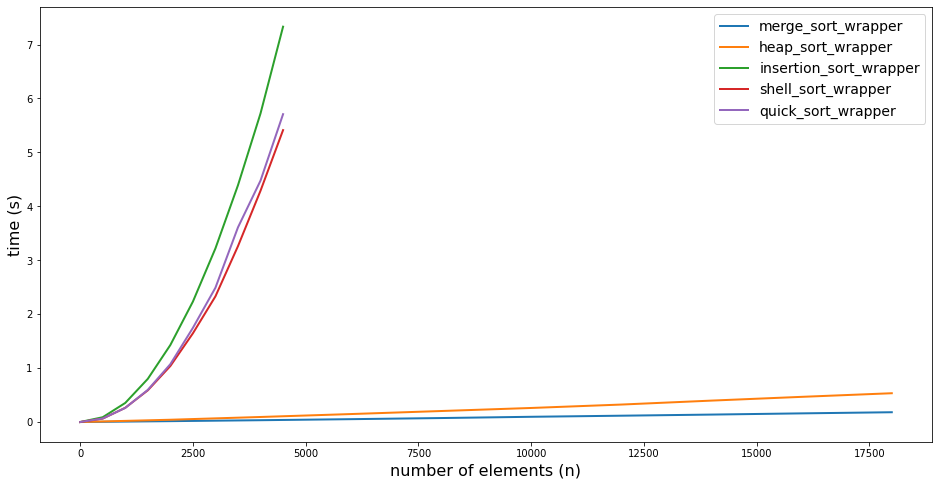

In [ ]:
plt.figure(figsize=(16,8))
plt.ylabel("time (s)", fontsize=16)
plt.xlabel("number of elements (n)", fontsize=16)

for k in df1.columns[:-1]:
    plt.plot(
        x_val if k not in ["insertion_sort_wrapper", "shell_sort_wrapper", "quick_sort_wrapper"] else x_val_2,
        df1.at[4, k]["times"], linewidth=2, label=k)
    
plt.legend(fontsize=14)